# Visualization

Based on our dataset and factors we considered for prediction, we planned to visualize some important stats to make it visiblly clear how are features are performing and used.

Bar plots: Used to display the total goals scored by top teams and bottom teams, as well as the distribution of goals for and against by top teams.

Pie charts: Utilized to represent the percentage distribution of match conditions, match days.

Line graphs: Depicted average goals scored per season over time, as well as the total goals scored per season.

Donut chart: Illustrated the distribution of match outcomes within a season.

Heatmaps: Visualized the correlation between numeric variables in the dataset.

Boxplots: Displayed the distribution of numerical variables, such as goals scored and conceded, across different categories, like home and away matches and attendance per outcomes

In [46]:
# Seaborn and matplotlib libraries used for visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [47]:
matches = pd.read_csv("final_dataset.csv")

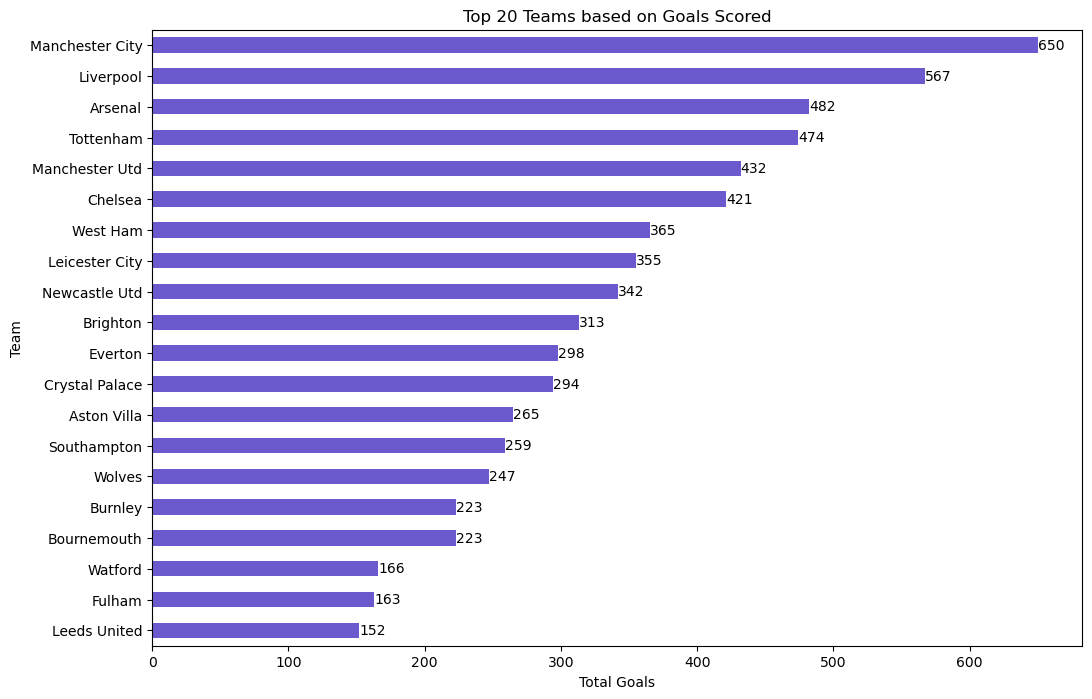

In [50]:
# Viz 1: Number of goals scored in descending order for top 20 teams

matches['team'] = matches['team'].str.strip()

# Now plot the top 20 teams based on goals scored

team_goals = matches.groupby('team')['gf'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 8))
bar_plot = team_goals.plot(kind='barh', color='slateblue')

# Annotate each bar with its corresponding value

for index, value in enumerate(team_goals):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.title('Top 20 Teams based on Goals Scored')
plt.xlabel('Total Goals')
plt.ylabel('Team')

# Invert y-axis for better readability

plt.gca().invert_yaxis()  
plt.show()

<Figure size 1200x800 with 0 Axes>

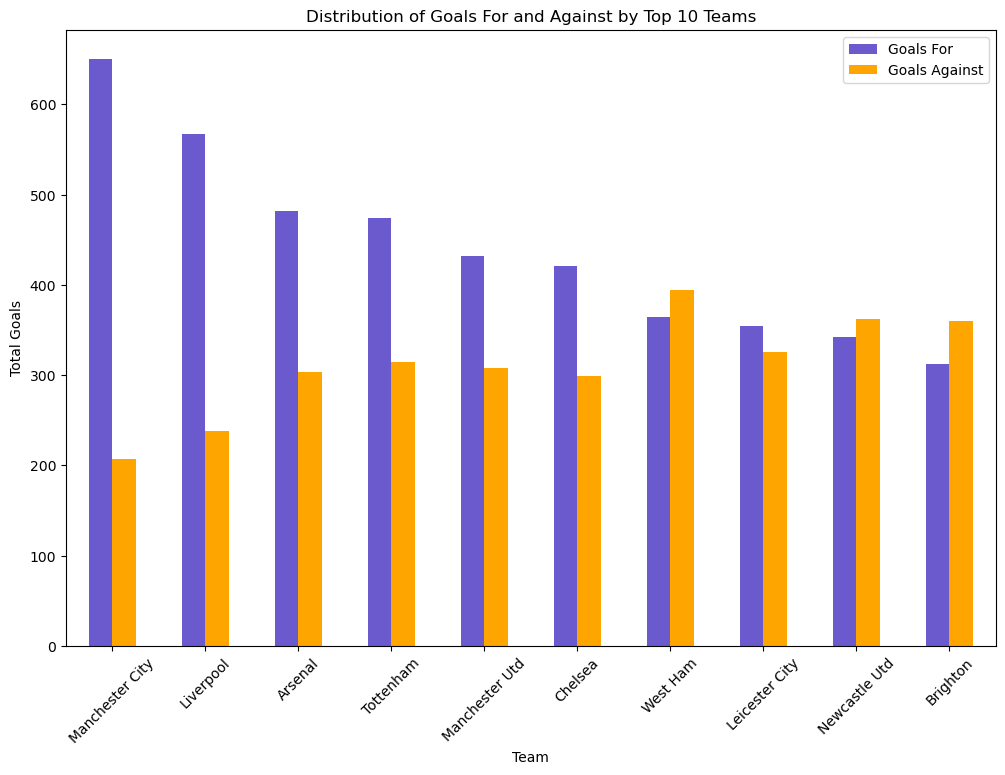

In [51]:
# Viz 2: Using a bar graph for depection of number of goals scored (gf) and conceded (ga) for top 10 teams

team_goals = matches.groupby('team')[['gf', 'ga']].sum().sort_values(by='gf', ascending=False)

# Selecting the top 10 teams based on goals scored

top_10_teams = team_goals.head(10)


plt.figure(figsize=(12, 8))
top_10_teams.plot(kind='bar', color=['slateblue', 'orange'], figsize=(12, 8))
plt.title('Distribution of Goals For and Against by Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.legend(['Goals For', 'Goals Against'])
plt.show()


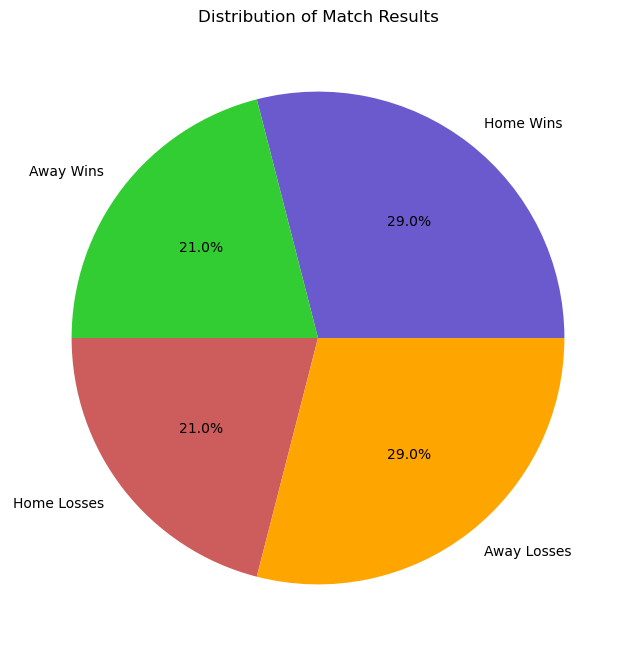

In [60]:
# Viz 3: Pie Chart depection of number of wins and losses at home and away for the whole dataset

# Filter matches by result and venue

home_wins = matches[(matches['result'] == 'W') & (matches['venue'] == 'Home')]
away_wins = matches[(matches['result'] == 'W') & (matches['venue'] == 'Away')]
home_losses = matches[(matches['result'] == 'L') & (matches['venue'] == 'Home')]
away_losses = matches[(matches['result'] == 'L') & (matches['venue'] == 'Away')]

# Count the number of matches in each category

home_win_count = len(home_wins)
away_win_count = len(away_wins)
home_loss_count = len(home_losses)
away_loss_count = len(away_losses)

# Create labels and counts for the pie chart

labels = ['Home Wins', 'Away Wins', 'Home Losses', 'Away Losses']
counts = [home_win_count, away_win_count, home_loss_count, away_loss_count]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['slateblue', 'limegreen', 'indianred', 'orange'])
plt.title('Distribution of Match Results')
plt.show()

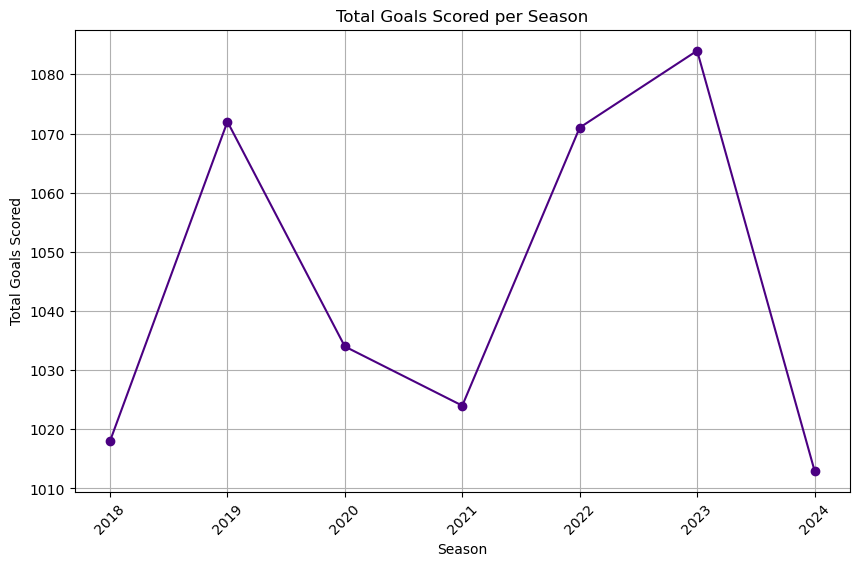

In [53]:
# Viz 4: Line Graph to show total goals scored per season 

# Limited number of matches are considered in present (2024) season, hence less number of goals than average

# Total Goals Scored per Season

total_goals_per_season = matches.groupby('season')['gf'].sum()
total_goals_per_season.plot(kind='line', marker='o', figsize=(10, 6), color='indigo')
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

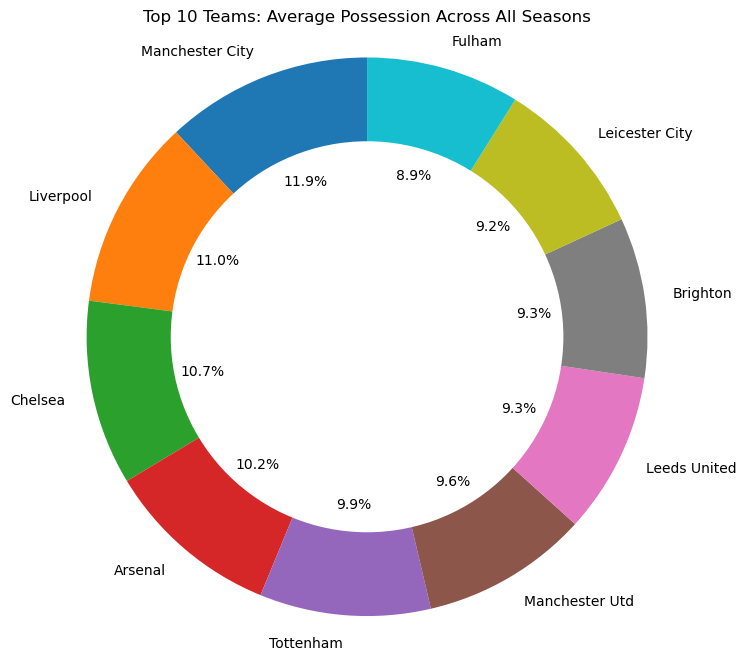

In [54]:
# Viz 5: Donut Chart to represent the possession of ball per team for top 10 teams

# Calculate the average possession for each team across all seasons

avg_possession_per_team = matches.groupby('team')['poss'].mean().sort_values(ascending=False)

# Select only the top 10 teams based on average possession

top_10_avg_possession = avg_possession_per_team.head(10)

# Create a donut chart for the top 10 teams

plt.figure(figsize=(8, 8))
plt.pie(top_10_avg_possession, labels=top_10_avg_possession.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Top 10 Teams: Average Possession Across All Seasons')

# Draw a white circle at the center to create the "donut" effect

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.show()

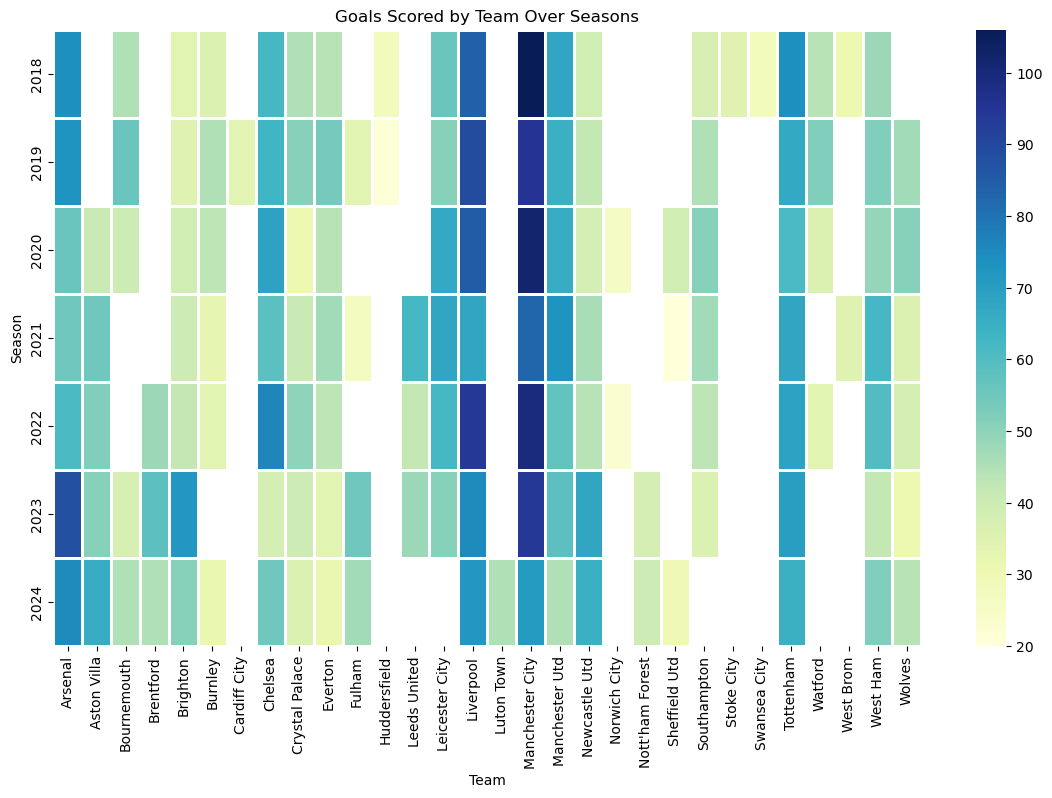

In [55]:
# Viz 6: Heatmap (Choropleth Map) to represent detailed data of goals scored range per each team across all seasons

# Pivot table for goals scored by team and season

goals_pivot = matches.pivot_table(index='season', columns='team', values='gf', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(goals_pivot, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.title('Goals Scored by Team Over Seasons')
plt.xlabel('Team')
plt.ylabel('Season')
plt.show()

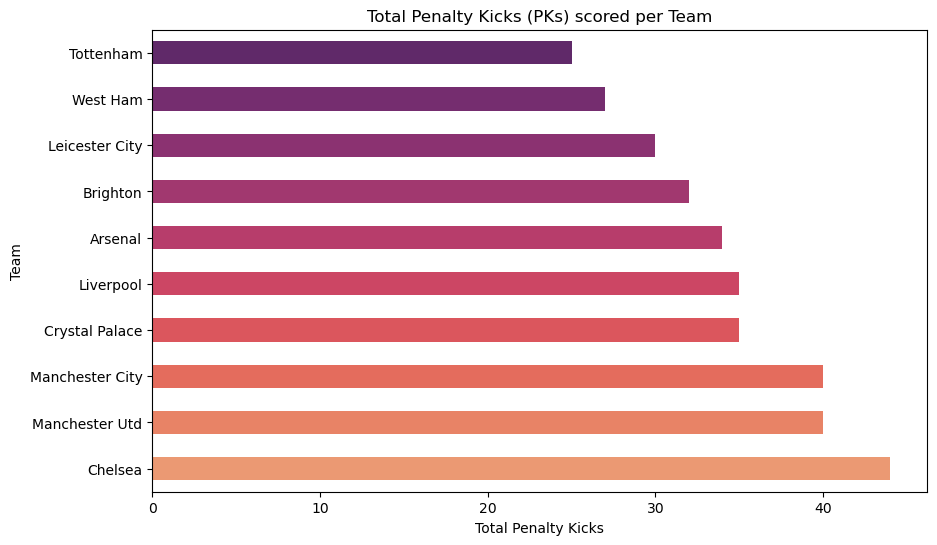

In [63]:
# Viz 7: Horizontal Bar Graph to show the distribution of penalty kicks scored for top 10 teams

# Calculate the sum of penalty kicks (PKs) per team for all seasons

total_pks_per_team = matches.groupby('team')['pk'].sum().sort_values(ascending=False)

# Select the top 10 teams

top_10_teams = total_pks_per_team.head(10)

# Create a color palette with gradient colors

colors = sns.color_palette("flare", len(top_10_teams))

plt.figure(figsize=(10, 6))
top_10_teams.plot(kind='barh', color=colors)
plt.title('Total Penalty Kicks (PKs) scored per Team')
plt.xlabel('Total Penalty Kicks')
plt.ylabel('Team')
plt.show()

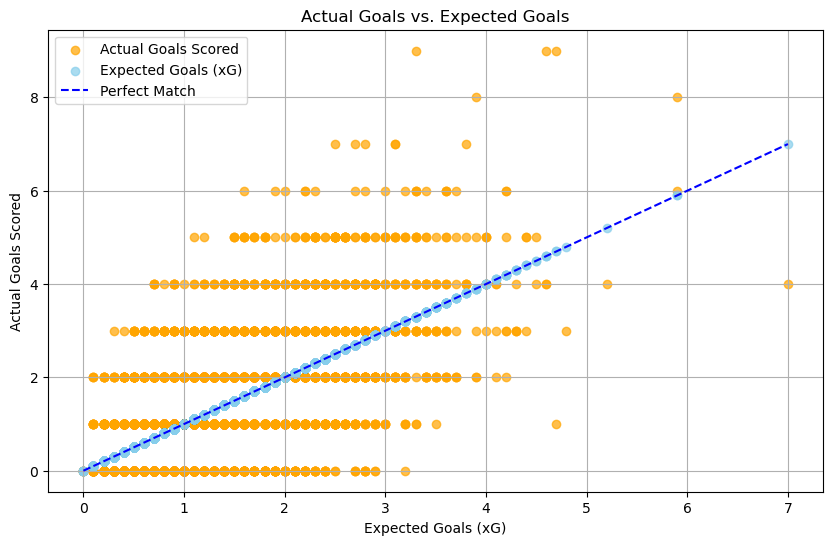

In [57]:
# Viz 8: Scatter plot to depict actual goals (gf) vs expected goals (xg)  

plt.figure(figsize=(10, 6))

# Scatter plot for actual goals (gf)

plt.scatter(matches['xg'], matches['gf'], color='orange', alpha=0.7, label='Actual Goals Scored')

# Scatter plot for expected goals (xg)

plt.scatter(matches['xg'], matches['xg'], color='skyblue', alpha=0.7, label='Expected Goals (xG)')

# Perfect match line

plt.plot([0, max(matches['xg'])], [0, max(matches['xg'])], color='blue', linestyle='--', label='Perfect Match')

plt.title('Actual Goals vs. Expected Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals Scored')
plt.legend()
plt.grid(True)
plt.show()

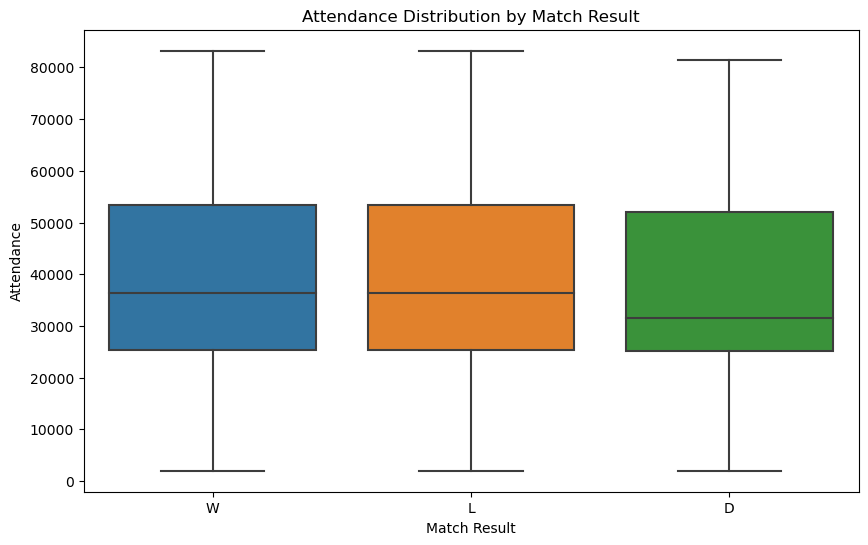

In [58]:
# Viz 9: Box Plot representation of attendance of game based on the outcome of the match

plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='attendance', data=matches)
plt.title('Attendance Distribution by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Attendance')
plt.show()

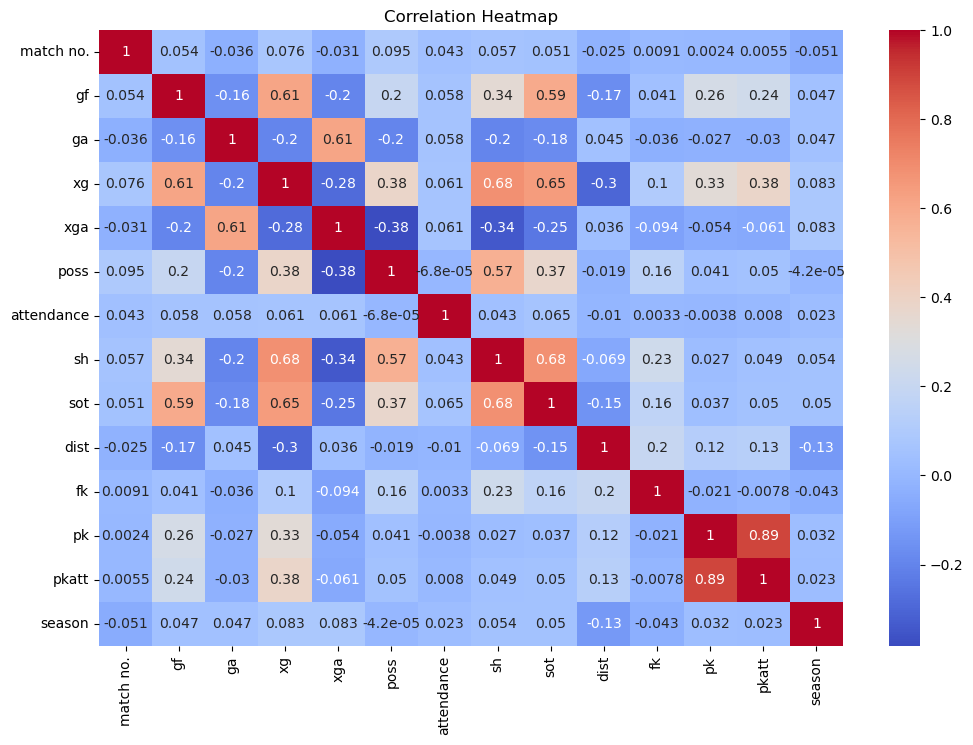

In [59]:
# Viz 10: Correlation Heatmap to show each numeric features correlation with other features

# Deleting notes column as it is non-numeric

del matches["notes"]

numeric_matches = matches.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_matches.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()